In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
# import tool to manipulate and visualize data

: check profile then predict that did they will full paying back ?

- credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
- purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase",        "small_business", and "all_other").
- int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged      by  
LendingClub.com to be more risky are assigned higher interest rates.
- installment: The monthly installments owed by the borrower if the loan is funded.
- log.annual.inc: The natural log of the self-reported annual income of the borrower.
- dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
- fico: The FICO credit score of the borrower.
days.with.cr.line: The number of days the borrower has had a credit line.
- revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
- inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
- delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
- pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [2]:
df = pd.read_csv('C:/Users/tanaw/Downloads/loan_data.csv')
df.head(3)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0


In [3]:
df.isna().sum() # check null value

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

### Explore data

how purpose effect notfullypaid ?

In [4]:
df_purpose_y = pd.pivot_table(data=df[['purpose','not.fully.paid']],index='purpose',columns=['not.fully.paid'],aggfunc=len,margins=True)
df_purpose_y 

not.fully.paid,0,1,All
purpose,,,
all_other,1944,387,2331
credit_card,1116,146,1262
debt_consolidation,3354,603,3957
educational,274,69,343
home_improvement,522,107,629
major_purchase,388,49,437
small_business,447,172,619
All,8045,1533,9578


In [5]:
df_purpose_y[0]/df_purpose_y['All'] # Fully_Paid_Rate IN each Purpose

purpose
all_other             0.833977
credit_card           0.884311
debt_consolidation    0.847612
educational           0.798834
home_improvement      0.829889
major_purchase        0.887872
small_business        0.722132
All                   0.839946
dtype: float64

<BarContainer object of 8 artists>

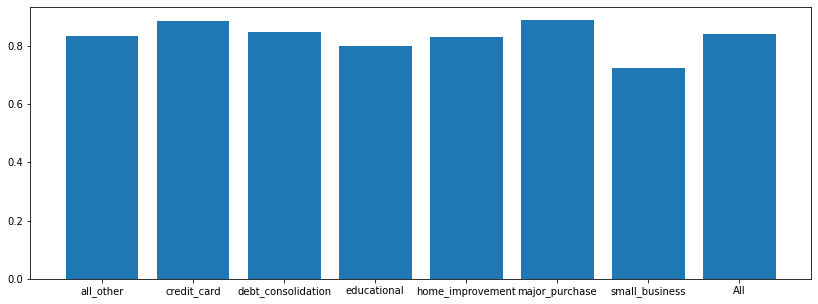

In [8]:
fully_paid_rate = df_purpose_y[0]/df_purpose_y['All']
plt.figure(figsize=(14,5))
plt.bar(fully_paid_rate.index,fully_paid_rate.values) # loan for small business trend to not fully paid 

how int.rate effect notfullypaid 

<AxesSubplot:xlabel='int.rate', ylabel='Count'>

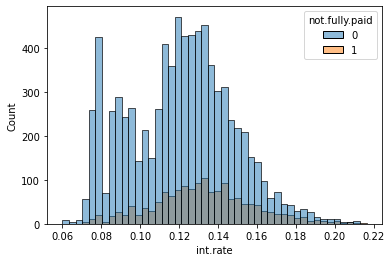

In [9]:
sns.histplot(data=df,x='int.rate',hue='not.fully.paid')

<AxesSubplot:xlabel='not.fully.paid', ylabel='int.rate'>

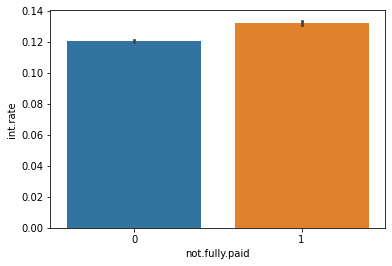

In [11]:
sns.barplot(data=df,y='int.rate',x='not.fully.paid') # 

In [13]:
df.groupby('not.fully.paid')['int.rate'].agg(np.mean) 
# int.rate effect a little to fully paid  
# so i decide to bootsample to sure that who not fully paid get higher int.rate about 1%

not.fully.paid
0    0.120770
1    0.132452
Name: int.rate, dtype: float64

In [26]:
diff_int_rate_list = []
for i in range(1000):
    df_sample_1 = df.sample(frac=1,replace=True) 
    int_rate_not_paid = df_sample_1.groupby('not.fully.paid')['int.rate'].agg(np.mean).loc[1]
    int_rate_paid = df.groupby('not.fully.paid')['int.rate'].agg(np.mean).loc[0]
    diff_int_rate = int_rate_not_paid - int_rate_paid
    diff_int_rate_list.append(diff_int_rate)
diff_int_rate_list[0:5]

[0.01080782474416965,
 0.011020114299786068,
 0.011238773942030614,
 0.011957940920456836,
 0.012404865514691513]

In [25]:
np.percentile(diff_int_rate_list,5) # who not fullypaid get higher int.rate about 1% for this dataset

0.010622182950035279

debt-to-income ratio (debt/income) effect notfullypaid ?

<AxesSubplot:xlabel='not.fully.paid', ylabel='dti'>

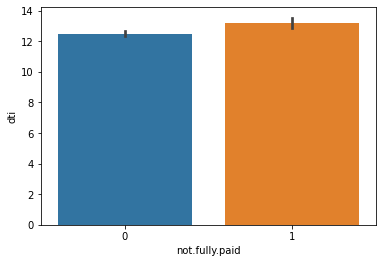

In [27]:
sns.barplot(data=df,y='dti',x='not.fully.paid') 
# not see a huge big 

<AxesSubplot:xlabel='dti', ylabel='Count'>

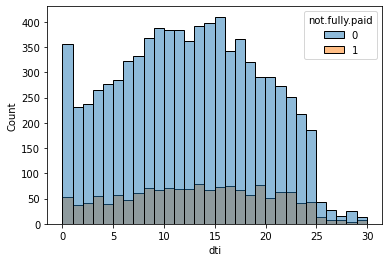

In [28]:
sns.histplot(data=df,x='dti',hue='not.fully.paid')
# plt.ylim(0,50)
# plt.xlim([25,30])
# So I try to focus who DTI more than 25 

In [38]:
print("Fully_paid_rate for DTI more than 25 =",1 - df[df['dti']>25]['not.fully.paid'].sum()/len(df[df['dti']>25]))
print("Fully_paid_rate for DTI less or equal 25 =",1 - df[df['dti']<=25]['not.fully.paid'].sum()/len(df[df['dti']<=25]))
# DTI less than 25 trend to fully_paid more than DIT>25

Fully_paid_rate for DTI more than 25 = 0.75
Fully_paid_rate for DTI less or equal 25 = 0.8413961383407595


In [41]:
print("number of who DTI > 25 :",len(df[df['dti']>25]))
print("number of who DTI <= 25 :",len(df[df['dti']<=25]))
# But size of DTI>25 is very low So I decide to bootsample data to sure that DTI effect fully_paid_rate

number of who DTI > 25 : 152
number of who DTI <= 25 : 9426


In [42]:
diff_fullVsDti_list = []
for i in range(2000):
    df_sample = df.sample(frac=1,replace=True) 
    fully_paid_rate_more = 1 - df_sample[df_sample['dti']>25]['not.fully.paid'].sum()/len(df_sample[df_sample['dti']>25])
    fully_paid_rate_less = 1 - df_sample[df_sample['dti']<=25]['not.fully.paid'].sum()/len(df_sample[df_sample['dti']<=25])
    diff = fully_paid_rate_less - fully_paid_rate_more 
    diff_fullVsDti_list.append(diff)
diff_fullVsDti_list[0:3]

[0.07797192511795925, 0.05728914572913468, 0.09546301338454044]

In [43]:
print(np.quantile(diff_fullVsDti_list,0.05))
# print 5th percentile of sample to sure that more DTI trend to not fullypaid

0.03433689859415343


### Model Selection

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score , KFold , train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.metrics import classification_report , confusion_matrix

In [45]:
df.head(3)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0


In [47]:
df_1 = pd.get_dummies(df,drop_first=True)
# convert column purpose to dummy variable for use in model 
df_1.head(2)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0


In [48]:
X = df_1.drop(columns=['not.fully.paid'],axis=1).values
y = df_1['not.fully.paid'].values
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25)
# seperate a data to train_set and test_set for test a model performance

In [49]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# convert feature to standard scale to see coef when use logistic regression and improve accuracy

In [50]:
models = {'LogisticRegression':LogisticRegression()
        ,'Knn':KNeighborsClassifier()
        ,'DecisionTree':DecisionTreeClassifier()
        ,'SVC':SVC()}
result_acc = []
for model in models.values():
        kf = KFold(n_splits=4,shuffle=True)
        cv_res = cross_val_score(model,X_train_scaled,y_train,cv=kf)
        result_acc.append(cv_res.mean())
result_acc
# see a accuracy in each model 

[0.8393402857479635,
 0.8163718042570615,
 0.7441206394897978,
 0.8408739476769795]

In [51]:
dict(zip(models.keys(),result_acc))
# DecisionTree have low performance So I decide to test parameter just 3 model !!

{'LogisticRegression': 0.8393402857479635,
 'Knn': 0.8163718042570615,
 'DecisionTree': 0.7441206394897978,
 'SVC': 0.8408739476769795}

In [55]:
lr_mld = LogisticRegression()
param_lr = {'C':[0.001, 0.01, 0.1, 1, 10]}
lr_mdl_tunning = GridSearchCV(lr_mld,param_lr)
lr_mdl_tunning.fit(X_train_scaled,y_train)
print(lr_mdl_tunning.best_params_)
print("best score for LogisticModel :",lr_mdl_tunning.best_score_)

{'C': 0.001}
best score for LogisticModel : 0.8397606627859417


In [56]:
knn_mld = KNeighborsClassifier()
param_knn = {'n_neighbors':list(range(5,15))}
# ,'metric':['minkowski','cityblock']
knn_mld_tunning = GridSearchCV(knn_mld,param_knn)
knn_mld_tunning.fit(X_train_scaled,y_train)
print(knn_mld_tunning.best_params_)
print("best score for Knn :",knn_mld_tunning.best_score_)

{'n_neighbors': 12}
best score for Knn : 0.8366972743819818


In [58]:
svc_mld = SVC()
param_svc = {'C':[0.1, 1, 10], 'gamma':[ 0.01, 0.1]}
svc_mld_tunning = GridSearchCV(svc_mld,param_svc)
svc_mld_tunning.fit(X_train_scaled,y_train)
print(svc_mld_tunning.best_params_)
print("best score for SVC :",svc_mld_tunning.best_score_)

{'C': 10, 'gamma': 0.01}
best score for SVC : 0.8401782962415897


In [ ]:
# every model acc around 83-84 % 
# I decide to drop some feature by look coef from LogisticRegression , It may improve performance for LogisticRe model

In [63]:
feature = df_1.drop(columns=['not.fully.paid'],axis=1).columns
feature

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business'],
      dtype='object')

In [62]:
lr_mld.fit(X_train_scaled,y_train)
lr_mld.coef_

array([[-0.13027595,  0.02663659,  0.23518924, -0.23241266, -0.01302651,
        -0.40763264,  0.0277167 ,  0.10529685,  0.08025751,  0.1941666 ,
        -0.08052495,  0.0700383 , -0.19908595, -0.18044927,  0.02084057,
         0.04191267, -0.07425455,  0.14177924]])

In [66]:
feature_X_coef = dict(zip(feature,lr_mld.coef_[0]))
feature_X_coef
# see coef of each feature in standard scale 

{'credit.policy': -0.13027594794869138,
 'int.rate': 0.026636589643743686,
 'installment': 0.2351892410868448,
 'log.annual.inc': -0.23241265851139065,
 'dti': -0.01302650616909638,
 'fico': -0.4076326446097526,
 'days.with.cr.line': 0.0277167004711788,
 'revol.bal': 0.10529684797992879,
 'revol.util': 0.08025751267367118,
 'inq.last.6mths': 0.1941666002034287,
 'delinq.2yrs': -0.0805249468602336,
 'pub.rec': 0.07003829831068255,
 'purpose_credit_card': -0.19908594992767548,
 'purpose_debt_consolidation': -0.1804492655892998,
 'purpose_educational': 0.020840573221112095,
 'purpose_home_improvement': 0.041912673495863424,
 'purpose_major_purchase': -0.07425454990162308,
 'purpose_small_business': 0.14177924307014161}

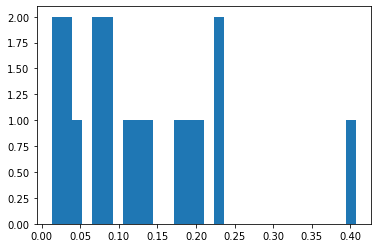

In [65]:
plt.hist(np.abs(lr_mld.coef_[0]),bins=30)
plt.show() # see range of coef to select a feature that impact for logis model 
# So I decide to cut off at 0.1 (select feature that coef > 0.1) 

In [67]:
np.array(list(feature_X_coef.keys()))[np.abs(list(feature_X_coef.values())) > 0.1]
# feature selected 

array(['credit.policy', 'installment', 'log.annual.inc', 'fico',
       'revol.bal', 'inq.last.6mths', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_small_business'],
      dtype='<U26')

In [69]:
X_new = df_1[['credit.policy', 'installment', 'log.annual.inc', 'fico',
       'revol.bal', 'inq.last.6mths', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_small_business']].values
y = df_1['not.fully.paid'].values
X_new_train , X_new_test ,y_train , y_test = train_test_split(X_new,y,test_size=0.25,random_state=0)
X_new_train_scaled = scaler.fit_transform(X_new_train)
X_new_test_scaled = scaler.transform(X_new_test)

In [82]:
lr_mld_drop = LogisticRegression(C=0.001)
lr_mld_drop.fit(X_new_train_scaled,y_train)
lr_mld_drop.score(X_new_test_scaled,y_test)
# drop some column by look a coef ==> not effect performance logistic model 

0.8405010438413362

### Predictive TestSet

In [79]:
y_pred_svc = svc_mld_tunning.predict(X_test_scaled)
print(confusion_matrix(y_test,y_pred_svc))
print(classification_report(y_test,y_pred_svc))


[[2011    3]
 [ 381    0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2014
           1       0.00      0.00      0.00       381

    accuracy                           0.84      2395
   macro avg       0.42      0.50      0.46      2395
weighted avg       0.71      0.84      0.77      2395



In [81]:
y_pred_knn = knn_mld_tunning.predict(X_test_scaled)
print(confusion_matrix(y_test,y_pred_knn))
print(classification_report(y_test,y_pred_knn))

[[2000   14]
 [ 377    4]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2014
           1       0.22      0.01      0.02       381

    accuracy                           0.84      2395
   macro avg       0.53      0.50      0.47      2395
weighted avg       0.74      0.84      0.77      2395



In [83]:
y_pred_lr_drop = lr_mld_drop.predict(X_new_test_scaled)
print(confusion_matrix(y_test,y_pred_lr_drop))
print(classification_report(y_test,y_pred_lr_drop))
# no one model can detect a notFullyPaid ,So I decide to try TreeDecision model that lower acc than 3 model

[[2013    1]
 [ 381    0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2014
           1       0.00      0.00      0.00       381

    accuracy                           0.84      2395
   macro avg       0.42      0.50      0.46      2395
weighted avg       0.71      0.84      0.77      2395



In [85]:
tree = DecisionTreeClassifier()
tree.fit(X_train_scaled,y_train)
y_pred_tree = tree.predict(X_test_scaled)
print(confusion_matrix(y_test,y_pred_tree))
print(classification_report(y_test,y_pred_tree))
# tree decision model can detect a notFullyPaid 

[[1673  341]
 [ 322   59]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      2014
           1       0.15      0.15      0.15       381

    accuracy                           0.72      2395
   macro avg       0.49      0.49      0.49      2395
weighted avg       0.73      0.72      0.73      2395



Idea for future improvements : 
 - dataset for test performance should have size of class positive and negative by equally 
 - try to feature engineer  
 - try building a deep learning 